In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
pathToFile = '/mnt/home/jbielecki1/NEMA/'
fileName = 'NEMA_IQ_384str_N0_1000_COINCIDENCES_PREPARED_part00'

data = pickle.load(open(pathToFile + fileName, 'rb'))

In [3]:
# Cut params
width1 = 1050.0
height1 = 42.0
center = 180.0
zCut = 10.85

In [4]:
dataClass1 = data[data['class'] == 1]
dataClass2 = data[data['class'] == 2]
dataClass3 = data[data['class'] == 3]
dataClass4 = data[data['class'] == 4]

/mnt/home/jbielecki1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


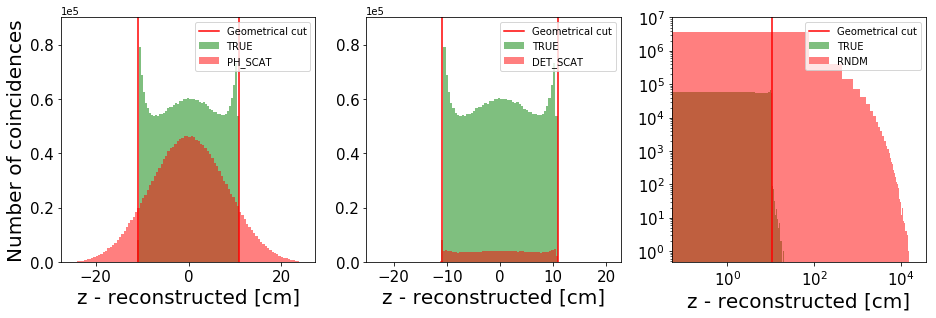

In [23]:
fig = plt.gcf()
fig.set_size_inches(15.5, 4.5)
#fig.suptitle('Pozycja rekonstruowanego punktu na osi Z', fontsize=16)
ax1 = plt.subplot(1,3,1)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.hist(dataClass1['rZ1'], bins = 100, alpha = 0.5, color = 'green', label = 'TRUE')
ax1.hist(dataClass2['rZ1'], bins = 100, alpha = 0.5, color = 'red', label = 'PH_SCAT')
ax1.set_ylabel('Number of coincidences', fontsize = 20)
ax1.set_xlabel('z - reconstructed [cm]', fontsize = 20)
ax1.tick_params(direction='out', labelsize = 15)
ax1.set_ylim([0, 90000])
plt.plot([-zCut, -zCut], [0, 100000], color = 'red', label = 'Geometrical cut')
plt.plot([zCut, zCut], [0, 100000], color = 'red')
ax1.legend()
ax2 = plt.subplot(1,3,2)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.hist(dataClass1['rZ1'], bins = 100, alpha = 0.5, color = 'green', label = 'TRUE')
ax2.hist(dataClass3['rZ1'], bins = 100, alpha = 0.5, color = 'red', label = 'DET_SCAT')
ax2.set_xlabel('z - reconstructed [cm]', fontsize = 20)
ax2.tick_params(direction='out', labelsize = 15)
ax2.set_ylim([0, 90000])
plt.plot([-zCut, -zCut], [0, 100000], color = 'red', label = 'Geometrical cut')
plt.plot([zCut, zCut], [0, 100000], color = 'red')
ax2.legend()
ax3 = plt.subplot(1,3,3)
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax3.hist(dataClass1['rZ1'], bins = 100, alpha = 0.5, color = 'green', label = 'TRUE')
ax3.hist(dataClass4['rZ1'], bins = 100, alpha = 0.5, color = 'red', label = 'RNDM')
ax3.set_xlabel('z - reconstructed [cm]', fontsize = 20)
ax3.tick_params(direction='out', labelsize = 15)
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim([0, 10000000])
plt.plot([-zCut, -zCut], [0, 10000000], color = 'red', label = 'Geometrical cut')
plt.plot([zCut, zCut], [0, 10000000], color = 'red')
ax3.legend()
plt.show()

In [11]:
def ellipseY(x, width, height, center):
    return center - height*math.sqrt(1 - x**2/width**2)

xEllipse1 = np.arange(-width1, width1+1)
yEllipse1 = np.array([ ellipseY(el, width1, height1, center) for el in xEllipse1 ])

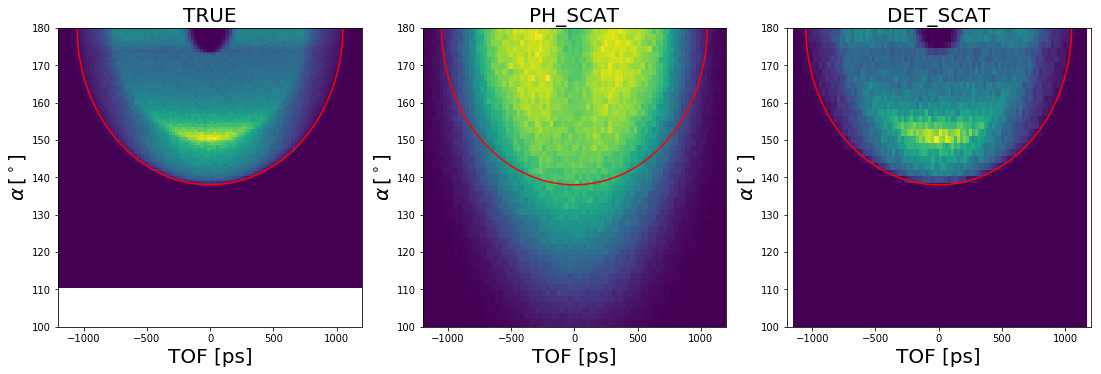

In [14]:
fig = plt.gcf()
#fig.suptitle('Kąt pomiędzy prostymi łączącymi punkty detekcji ze środkiem detektora (w płaszczyźnie XY) \
#w funkcji różnicy czasu', fontsize=16)
fig.set_size_inches(18.5, 5.5)
ax1 = plt.subplot(1,3,1)
ax1.hist2d(y = dataClass1['deg2D'], x = dataClass1['dt'], bins = 100)
ax1.set_ylim([100, 180])
ax1.set_xlim([-1200, 1200])
ax1.set_title('TRUE', fontsize = 20)
ax1.set_ylabel(r'$\alpha\,[^\circ]$', fontsize = 20)
ax1.set_xlabel('TOF [ps]', fontsize = 20)
plt.plot(xEllipse1, yEllipse1, color = 'red')
ax2 = plt.subplot(1,3,2)
ax2.hist2d(y = dataClass2['deg2D'], x = dataClass2['dt'], bins = 100)
ax2.set_ylim([100, 180])
ax2.set_xlim([-1200, 1200])
ax2.set_title('PH_SCAT', fontsize = 20)
ax2.set_ylabel(r'$\alpha\,[^\circ]$', fontsize = 20)
ax2.set_xlabel('TOF [ps]', fontsize = 20)
plt.plot(xEllipse1, yEllipse1, color = 'red')
ax3 = plt.subplot(1,3,3)
ax3.hist2d(y = dataClass3['deg2D'], x = dataClass3['dt'], bins = 100)
ax3.set_ylim([100, 180])
ax3.set_xlim([-1200, 1200])
ax3.set_title('DET_SCAT', fontsize = 20)
ax3.set_ylabel(r'$\alpha\,[^\circ]$', fontsize = 20)
ax3.set_xlabel('TOF [ps]', fontsize = 20)
plt.plot(xEllipse1, yEllipse1, color = 'red')
plt.show()

In [15]:
def cutGeometry(row):
    prediction = True
    rowClass = row['class']
    
    # Check z
    if row['rZ1'] > zCut or row['rZ1'] < -zCut:
        prediction = False
        
    # Check ellipse1
    if row['dt'] < -width1 or row['dt'] > width1:
        prediction = False
    else:
        if row['deg2D'] < ellipseY(row['dt'], width1, height1, center):
            prediction = False
    
    if prediction and row['class'] == 1:
        return 1 # TP
    elif prediction and row['class'] != 1:
        return 2 # FP
    elif ~prediction and row['class'] != 1:
        return 3 # TN
    elif ~prediction and row['class'] == 1:
        return 4 # FN

In [16]:
cuttedData = data.apply(cutGeometry, axis = 1)

In [17]:
TP = len(cuttedData[cuttedData == 1])
FP = len(cuttedData[cuttedData == 2])
TN = len(cuttedData[cuttedData == 3])
FN = len(cuttedData[cuttedData == 4])

In [18]:
ACC = (TP + TN)/len(cuttedData) # accuracy
TPR = TP/(TP + FN) # recall
TNR = TN/(TN + FP) # selectivity
PPV = TP/(TP + FP) # precision
FPR = FP/(FP + TN) # background acceptance

print("Negative events (starting point of accuracy): " + str(len(data[data['class'] != 1])/len(data)*100.0) + "%")
print("Accuracy: " + str(ACC*100) + "%")
print("Recall: " + str(TPR*100) + "%")
print("Selectivity: " + str(TNR*100) + "%")
print("Precision: " + str(PPV*100) + "%")
print("Backgroung acceptance: " + str(FPR*100) + "%")

Negative events (starting point of accuracy): 70.79917%
Accuracy: 85.64086%
Recall: 99.62617500940898%
Selectivity: 79.87267364857526%
Precision: 67.12174086588766%
Backgroung acceptance: 20.127326351424742%


In [19]:
pPsOrginalPositive = pd.DataFrame(data[data['class'] == 1]['class'], columns = ["class"])
pPsOrginalNegative = pd.DataFrame(data[data['class'] != 1]['class'], columns = ["class"])
cuttedData.name = 'type'
pPsPredictedPositive = pd.DataFrame(pd.concat([cuttedData[cuttedData == 1], cuttedData[cuttedData == 2]]).sort_index())
pPsPredictedNegative = pd.DataFrame(pd.concat([cuttedData[cuttedData == 3], cuttedData[cuttedData == 4]]).sort_index())

In [20]:
Class1 = len(dataClass1)
Class2 = len(dataClass2)
Class3 = len(dataClass3)
Class4 = len(dataClass4)
Class1P = len(pd.merge(pPsPredictedPositive, dataClass1[['class']],left_index=True, right_index=True))
Class2P = len(pd.merge(pPsPredictedPositive, dataClass2[['class']],left_index=True, right_index=True))
Class3P = len(pd.merge(pPsPredictedPositive, dataClass3[['class']],left_index=True, right_index=True))
Class4P = len(pd.merge(pPsPredictedPositive, dataClass4[['class']],left_index=True, right_index=True))
Class1N = len(pd.merge(pPsPredictedNegative, dataClass1[['class']],left_index=True, right_index=True))
Class2N = len(pd.merge(pPsPredictedNegative, dataClass2[['class']],left_index=True, right_index=True))
Class3N = len(pd.merge(pPsPredictedNegative, dataClass3[['class']],left_index=True, right_index=True))
Class4N = len(pd.merge(pPsPredictedNegative, dataClass4[['class']],left_index=True, right_index=True))

In [21]:
print(Class1P + Class2P + Class3P + Class4P + Class1N + Class2N + Class3N + Class4N)

10000000


In [22]:
Class1ACC = (Class1P)/(Class1P + Class1N)*100.0
Class2ACC = (Class2N)/(Class2P + Class2N)*100.0
Class3ACC = (Class3N)/(Class3P + Class3N)*100.0
Class4ACC = (Class4N)/(Class4P + Class4N)*100.0

print("Class 1 accuracy: " + str(Class1ACC) + "%")
print("Class 2 accuracy: " + str(Class2ACC) + "%")
print("Class 3 accuracy: " + str(Class3ACC) + "%")
print("Class 4 accuracy: " + str(Class4ACC) + "%")

Class 1 accuracy: 99.62617500940898%
Class 2 accuracy: 41.84647474786669%
Class 3 accuracy: 0.7155960442141696%
Class 4 accuracy: 97.49241220119654%
